# Importing Libraries

In [25]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

# Loading Data

In [26]:

import pandas as pd

df_users = pd.read_csv(r"D:\Graduation Project\BMIDataset.csv")
df_foods = pd.read_csv(r"D:\Graduation Project\daily_food_nutrition_dataset.csv")


# Exploratory Data Analysis (EDA) 



In [27]:
# Display the first few rows of the users dataset
df_users.head()


,Unnamed: 0,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
0,1,2,16.097862,0.932025,F,18.531612,958.584,1.2,1150.3008,8,13
1,2,4,14.619374,0.916687,F,17.397496,932.383,1.7,1585.0511,7,1
2,4,4,17.899918,0.997288,F,17.997414,977.578,1.9,1857.3982,7,4
3,6,3,13.532880,1.022786,F,12.936609,944.689,1.9,1794.9091,7,3
4,8,4,17.039484,1.053977,M,15.338909,799.229,1.9,1518.5351,7,0


In [28]:
# Overview of column types and non-null values
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10726 entries, 0 to 10725
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   10726 non-null  int64  
 1   age                          10726 non-null  int64  
 2   weight(kg)                   10726 non-null  float64
 3   height(m)                    10726 non-null  float64
 4   gender                       10726 non-null  object 
 5   BMI                          10726 non-null  float64
 6   BMR                          10726 non-null  float64
 7   activity_level               10726 non-null  float64
 8   calories_to_maintain_weight  10726 non-null  float64
 9   BMI_tags                     10726 non-null  int64  
 10  Label                        10726 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 921.9+ KB


In [29]:
# Count of missing values per column
df_users.isnull().sum()


Unnamed: 0                     0
age                            0
weight(kg)                     0
height(m)                      0
gender                         0
BMI                            0
BMR                            0
activity_level                 0
calories_to_maintain_weight    0
BMI_tags                       0
Label                          0
dtype: int64

In [30]:
# Summary statistics of numerical features
df_users.describe()


,Unnamed: 0,age,weight(kg),height(m),BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
count,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000
mean,11664.753123,26.778575,61.647728,1.540276,24.788317,1442.049923,1.487451,2118.574075,8.253496,19.332650
std,6814.683196,18.201675,24.254566,0.186042,6.954637,250.686166,0.239625,388.425427,0.754767,9.746498
min,1.000000,2.000000,12.005536,0.856328,10.342285,667.941000,1.200000,953.540900,7.000000,0.000000
25%,5959.750000,13.000000,45.538375,1.564845,19.557137,1320.322500,1.300000,1815.879700,8.000000,16.000000
50%,10695.500000,23.000000,61.323460,1.631282,23.056039,1493.165000,1.500000,2104.599800,8.000000,20.000000
75%,17455.250000,36.000000,83.484585,1.632234,31.334294,1602.488000,1.700000,2405.301750,9.000000,28.000000
max,23998.000000,90.000000,98.799820,1.633223,37.142927,1914.374000,1.900000,2949.075500,9.000000,31.000000


In [31]:
df_users['gender'].unique()


array(['F', 'M'], dtype=object)

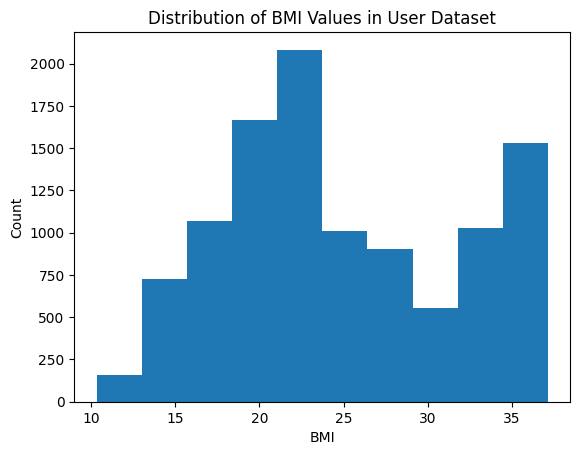

In [32]:
# plot distribution of BMI values
plt.hist(df_users['BMI'], bins=10)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI Values in User Dataset')
plt.show()

In [33]:
# Display the first few rows of the food dataset
df_foods.head()


,Date,User_ID,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml)
0,9/11/2024,496,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125,Lunch,478
1,12/17/2024,201,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97,Lunch,466
2,6/9/2024,776,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157,Breakfast,635
3,8/27/2024,112,Banana,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13,Snack,379
4,7/28/2024,622,Banana,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148,Lunch,471


In [34]:
# Display structure and types
df_foods.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   User_ID            10000 non-null  int64  
 2   Food_Item          10000 non-null  object 
 3   Category           10000 non-null  object 
 4   Calories (kcal)    10000 non-null  int64  
 5   Protein (g)        10000 non-null  float64
 6   Carbohydrates (g)  10000 non-null  float64
 7   Fat (g)            10000 non-null  float64
 8   Fiber (g)          10000 non-null  float64
 9   Sugars (g)         10000 non-null  float64
 10  Sodium (mg)        10000 non-null  int64  
 11  Cholesterol (mg)   10000 non-null  int64  
 12  Meal_Type          10000 non-null  object 
 13  Water_Intake (ml)  10000 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 1.1+ MB


In [35]:
# Check for null values
df_foods.isnull().sum()


Date                 0
User_ID              0
Food_Item            0
Category             0
Calories (kcal)      0
Protein (g)          0
Carbohydrates (g)    0
Fat (g)              0
Fiber (g)            0
Sugars (g)           0
Sodium (mg)          0
Cholesterol (mg)     0
Meal_Type            0
Water_Intake (ml)    0
dtype: int64

In [36]:
# Basic statistics for nutrients and calories
df_foods.describe()


,User_ID,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,498.706300,327.693900,25.523050,52.568550,25.43735,4.986940,25.052570,497.969000,151.886600,554.353600
std,289.123477,158.194716,14.131993,27.387152,14.14532,2.864984,14.480605,287.988001,87.360643,260.977642
min,1.000000,50.000000,1.000000,5.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.000000
25%,245.000000,190.000000,13.200000,28.800000,13.30000,2.500000,12.500000,249.750000,76.000000,327.000000
50%,492.000000,328.000000,25.500000,52.800000,25.30000,5.000000,25.000000,495.000000,153.000000,555.500000
75%,748.000000,464.000000,37.700000,76.400000,37.60000,7.500000,37.700000,749.000000,228.000000,783.000000
max,1000.000000,600.000000,50.000000,100.000000,50.00000,10.000000,50.000000,1000.000000,300.000000,1000.000000


In [37]:
# Different types of meals
df_foods['Meal_Type'].unique()


array(['Lunch', 'Breakfast', 'Snack', 'Dinner'], dtype=object)

In [38]:
# Most frequent food categories
df_foods['Category'].value_counts().head(10)


Category
Dairy         1460
Fruits        1453
Beverages     1445
Snacks        1432
Meat          1418
Vegetables    1408
Grains        1384
Name: count, dtype: int64

# Function Development for Model Prediction

In [39]:

# define function to get target label
def get_target_label(index):
    if index < 18.5:
        return 'Underweight'
    elif index >= 18.5 and index < 25:
        return 'Normal'
    elif index >= 25 and index < 30:
        return 'Overweight'
    elif index >= 30:
        return 'Obese'
    else:
        return 'Unknown'


In [40]:
df_users['Target'] = df_users['Label'].apply(get_target_label)
df_users['BMI'] = df_users['weight(kg)'] / (df_users['height(m)'] ** 2)

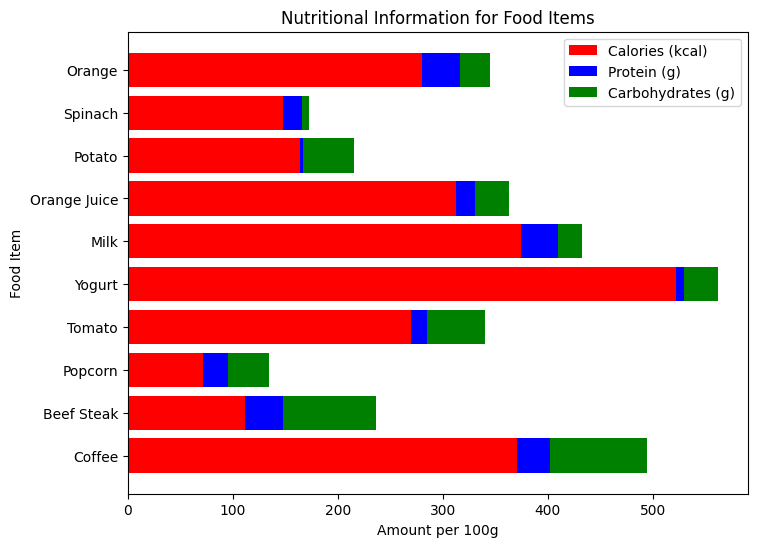

In [41]:
# create a sample data of random values in df_foods
df_sample_foods = df_foods.sample(n=10, random_state=50)


# create horizontal bar chart
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(df_sample_foods['Food_Item'], df_sample_foods['Calories (kcal)'], color='r', label='Calories (kcal)')
ax.barh(df_sample_foods['Food_Item'], df_sample_foods['Protein (g)'], left=df_sample_foods['Calories (kcal)'], color='b', label='Protein (g)')
ax.barh(df_sample_foods['Food_Item'], df_sample_foods['Carbohydrates (g)'], left=df_sample_foods['Calories (kcal)']+df_sample_foods['Protein (g)'], color='g', label='Carbohydrates (g)')
ax.set_xlabel('Amount per 100g')
ax.set_ylabel('Food Item')
ax.set_title('Nutritional Information for Food Items')
ax.legend()
plt.show()

# Training and Test The  Model

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_users[['weight(kg)', 'height(m)']],  
    df_users['BMI'],
    test_size=0.2,
    random_state=42
)


In [43]:

# train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [44]:
def recommend_foods(weight, height, target, allergic_or_disliked_foods):
    # Calculate BMI
    bmi = weight / (height ** 2)
    target_label = get_target_label(bmi)

    # Filter foods based on the target goal
    if target == 1:  # Gain weight
        recommended_foods = df_foods[df_foods['Calories (kcal)'] > 300]
    elif target == 2:  # Maintain weight
        recommended_foods = df_foods[(df_foods['Calories (kcal)'] >= 200) & (df_foods['Calories (kcal)'] <= 300)]
    elif target == 3:  # Lose weight
        recommended_foods = df_foods[df_foods['Calories (kcal)'] < 200]
    else:
        recommended_foods = df_foods  # Show all foods if the input is invalid

    # Filter out allergic or disliked foods
    recommended_foods = recommended_foods[~recommended_foods['Food_Item'].isin(allergic_or_disliked_foods)]

    # Return 10 randomly selected food items, along with BMI and weight category
    return recommended_foods.sample(n=10), bmi, target_label



Here is a list of available foods:
1. Eggs
2. Apple
3. Chicken Breast
4. Banana
5. Oats
6. Carrot
7. Cookies
8. Quinoa
9. Tomato
10. Orange Juice
11. Beef Steak
12. Pork Chop
13. Grapes
14. Milkshake
15. Pasta
16. Orange
17. Nuts
18. Cheese
19. Strawberry
20. Butter
21. Rice
22. Yogurt
23. Broccoli
24. Water
25. Paneer
26. Salmon
27. Milk
28. Coffee
29. Spinach
30. Potato
31. Green Tea
32. Bread
33. Chocolate
34. Chips
35. Popcorn


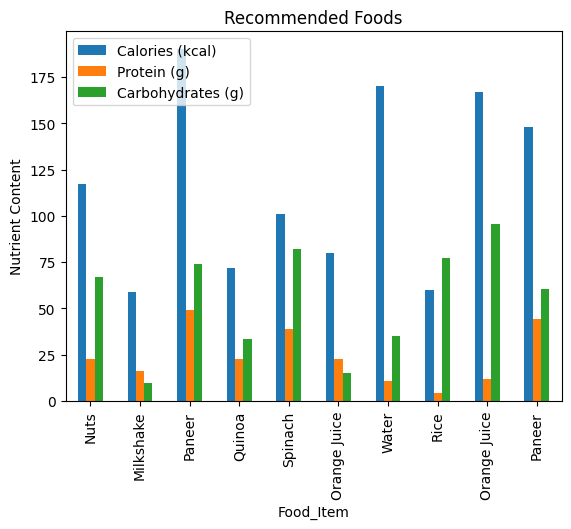

Recommended foods based on your BMI of  23.37472607742878
      Date  User_ID    Food_Item   Category  Calories (kcal)  Protein (g)  Carbohydrates (g)  Fat (g)  Fiber (g)  Sugars (g)  Sodium (mg)  Cholesterol (mg) Meal_Type  Water_Intake (ml)
  1/9/2024      415         Nuts     Snacks              117         22.6               67.0      5.1        3.3        13.4          244               200 Breakfast                764
 8/29/2024      773    Milkshake  Beverages               59         16.3               10.0      8.2        4.2        16.9          271                76    Dinner                290
12/18/2024      669       Paneer      Dairy              190         48.9               74.2     34.9        3.2        28.7          302               112    Dinner                351
  8/2/2024      728       Quinoa     Grains               72         22.6               33.7     30.0        3.8        10.2          691               228    Dinner                120
12/31/2024      5

In [45]:
# user input
weight = float(input("Enter your weight in kg: "))
height = float(input("Enter your height in cm: ")) / 100 
age = int(input("Enter your age in years: "))  
gender = input("Enter your gender (M for Male, F for Female): ").upper()  
target = int(input("Enter your target (1 for Gain weight, 2 for Maintain weight, 3 for Lose weight): "))

# Display list of foods for the user to choose from
print("\nHere is a list of available foods:")
for index, food in enumerate(df_foods['Food_Item'].unique(), 1):
    print(f"{index}. {food}")


user_input = input("\nEnter the numbers of foods you dislike or are allergic to (separate with commas): ")

# Convert the user's input into a list of indices
try:
    allergic_or_disliked_foods_indices = [int(x.strip()) - 1 for x in user_input.split(',')]
    
    # Ensure all indices are valid
    if any(index < 0 or index >= len(df_foods['Food_Item'].unique()) for index in allergic_or_disliked_foods_indices):
        raise ValueError("One or more of the food indices are out of range.")
except ValueError as e:
    print(f"Invalid input: {e}")
    allergic_or_disliked_foods_indices = []

# Map the selected indices to food items
allergic_or_disliked_foods = df_foods['Food_Item'].unique()[allergic_or_disliked_foods_indices]


recommended_foods, bmi, target_label = recommend_foods(weight, height, target, allergic_or_disliked_foods)


recommended_foods.plot(x='Food_Item', y=['Calories (kcal)', 'Protein (g)', 'Carbohydrates (g)'], kind='bar')
plt.xlabel('Food_Item')
plt.ylabel('Nutrient Content')
plt.title('Recommended Foods')
plt.show()


print("Recommended foods based on your BMI of ", bmi)
print(recommended_foods.to_string(index=False))




In [46]:

# make predictions on test set
y_pred = model.predict(X_test)

# calculate MSE and MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# print results
print('MSE:', mse)
print('MAE:', mae)

# print MSE
print("Mean Squared Error:", mse)

MSE: 0.0032868690586044854
MAE: 0.02599207868072974
Mean Squared Error: 0.0032868690586044854


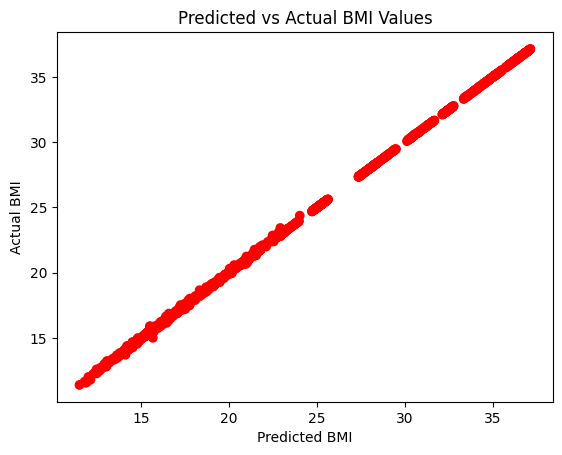

In [47]:

# make predictions on test set
y_pred = model.predict(X_test)

# create scatter plot
plt.scatter(y_pred, y_test, c=['red' if pred != actual else 'blue' for pred, actual in zip(y_pred, y_test)])
plt.xlabel('Predicted BMI')
plt.ylabel('Actual BMI')
plt.title('Predicted vs Actual BMI Values')
plt.show()


In [48]:
r2_score = model.score(X_test, y_test)
print('R2 score:', r2_score)

R2 score: 0.9999307780132051
